In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.use("nbagg")

# Angles calculation
How to extract angles from csv (Mediapipe data)

In [4]:
rfsn = pd.read_csv("/Users/quentinveyrat/Desktop/NicolasCSV/RFSN_1686575814_ID_Nicolas_cam_4.csv", header=None)
# rfsn = pd.read_csv("/Users/quentinveyrat/Desktop/RFSN_1684482569_ID_julie_cam_4 - RFSN_1684482569_ID_julie_cam_4.csv.csv", header=None)

In [5]:
rfsn

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.5939,0.6451,-0.0142,0.6003,0.6364,-0.0064,0.6004,0.6348,-0.0064,0.6003,...,0.1923,0.3401,0.7163,0.0121,0.3809,0.7398,0.1661,0.3685,0.7655,-0.0325
1,0.5950,0.6457,-0.0032,0.6010,0.6369,0.0042,0.6009,0.6351,0.0041,0.6006,...,0.1872,0.3405,0.7188,-0.0062,0.3782,0.7502,0.1611,0.3688,0.7719,-0.0513
2,0.5954,0.6437,-0.0118,0.6015,0.6349,-0.0042,0.6013,0.6333,-0.0042,0.6011,...,0.2021,0.3398,0.7150,-0.0045,0.3799,0.7469,0.1760,0.3659,0.7709,-0.0517
3,0.5950,0.6437,-0.0020,0.6012,0.6354,0.0058,0.6011,0.6338,0.0057,0.6010,...,0.2025,0.3402,0.7179,-0.0174,0.3803,0.7460,0.1776,0.3688,0.7721,-0.0643
4,0.5948,0.6436,-0.0031,0.6011,0.6355,0.0046,0.6010,0.6339,0.0046,0.6008,...,0.1975,0.3404,0.7181,-0.0198,0.3794,0.7483,0.1709,0.3685,0.7718,-0.0676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.5652,0.6521,-0.0201,0.5714,0.6452,-0.0118,0.5717,0.6437,-0.0119,0.5720,...,0.1921,0.3322,0.7332,-0.0030,0.3768,0.7554,0.1598,0.3641,0.7739,-0.0578
469,0.5658,0.6515,-0.0165,0.5719,0.6450,-0.0090,0.5722,0.6436,-0.0090,0.5726,...,0.1967,0.3335,0.7258,0.0070,0.3767,0.7529,0.1682,0.3647,0.7695,-0.0437
470,0.5658,0.6514,-0.0162,0.5721,0.6449,-0.0086,0.5724,0.6435,-0.0086,0.5727,...,0.1892,0.3328,0.7302,-0.0024,0.3761,0.7549,0.1589,0.3643,0.7707,-0.0550
471,0.5659,0.6527,-0.0277,0.5722,0.6459,-0.0195,0.5725,0.6444,-0.0196,0.5728,...,0.2001,0.3320,0.7293,0.0070,0.3773,0.7516,0.1680,0.3630,0.7703,-0.0481


In [6]:
landmark_12 = rfsn.iloc[:, 36:39]
landmark_14 = rfsn.iloc[:, 42:45]
landmark_24 = rfsn.iloc[:, 72:75]
landmark_26 = rfsn.iloc[:, 78:81]
min_len = min(len(landmark_12.index), len(landmark_14.index), len(landmark_24.index), len(landmark_26.index))
print("Longueur minimum des données :", min_len)

Longueur minimum des données : 473


In [7]:
A = np.array([landmark_26.iloc[:,0],landmark_26.iloc[:,1]]).T
B = np.array([landmark_24.iloc[:,0],landmark_24.iloc[:,1]]).T
C = np.array([landmark_12.iloc[:,0],landmark_12.iloc[:,1]]).T
D = np.array([landmark_14.iloc[:,0],landmark_14.iloc[:,1]]).T

In [8]:
def calculate_angle(a,b,c) -> float:
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle >180.0:
        angle = 360-angle

    return angle

In [9]:
angles_ABC = []
angles_BCD = []

for i in range (0,min_len):
    angle_ABC = calculate_angle(A[i], B[i], C[i])
    angle_BCD = calculate_angle(B[i], C[i], D[i])

    angles_ABC.append(angle_ABC)
    angles_BCD.append(angle_BCD)

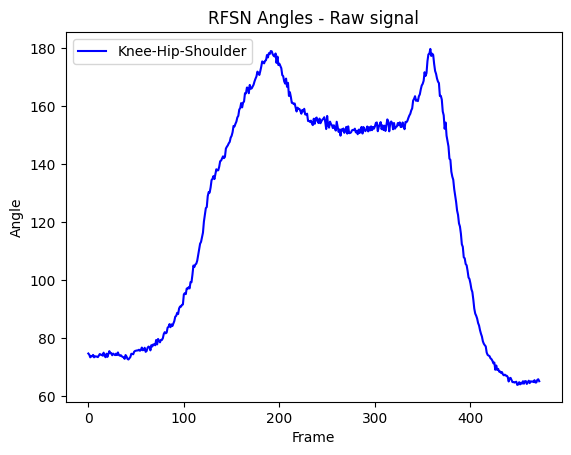

In [10]:
plt.plot(angles_ABC, color="blue", label="Knee-Hip-Shoulder")
# plt.plot(angles_BCD, color="red", label="Hip-Shoulder-Elbow")
# plt.plot([0,min_len],[180,180], color="gray")
plt.title("RFSN Angles - Raw signal");
plt.xlabel("Frame");
plt.ylabel("Angle");
plt.legend(loc="upper left");

# Points alignement
(Mediapipe data)

In [15]:
brgm_cam4 = pd.read_csv("/Users/quentinveyrat/Desktop/NicolasCSV/BRGM_1686573510_ID_Nicolas_cam_4.csv", header=None)

In [16]:
brgm_cam4

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.6679,0.6850,-0.0011,0.6757,0.6937,-0.0071,0.6765,0.6974,-0.0071,0.6772,...,-0.1165,0.3906,0.5710,-0.0365,0.3968,0.5012,-0.1522,0.4003,0.4984,-0.0647
1,0.6678,0.6847,-0.0294,0.6759,0.6944,-0.0358,0.6765,0.6978,-0.0358,0.6770,...,-0.0946,0.3944,0.5709,-0.0196,0.4010,0.5044,-0.1337,0.4051,0.4975,-0.0493
2,0.6671,0.6828,-0.0071,0.6750,0.6910,-0.0148,0.6754,0.6944,-0.0148,0.6758,...,-0.1115,0.3931,0.5720,-0.0366,0.4009,0.5000,-0.1566,0.4039,0.4947,-0.0714
3,0.6700,0.6813,-0.0226,0.6767,0.6892,-0.0298,0.6773,0.6924,-0.0298,0.6778,...,-0.1157,0.3950,0.5746,-0.0350,0.4030,0.4908,-0.1635,0.4066,0.4909,-0.0712
4,0.6700,0.6804,-0.0345,0.6766,0.6888,-0.0418,0.6771,0.6917,-0.0418,0.6777,...,-0.0972,0.3952,0.5741,-0.0108,0.4017,0.4923,-0.1449,0.4061,0.4905,-0.0464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,0.6705,0.6823,-0.0300,0.6776,0.6896,-0.0384,0.6782,0.6933,-0.0384,0.6789,...,-0.1050,0.3944,0.5710,0.0095,0.4006,0.5021,-0.1512,0.4064,0.4939,-0.0198
511,0.6710,0.6815,-0.0265,0.6781,0.6888,-0.0359,0.6787,0.6921,-0.0360,0.6795,...,-0.1098,0.3948,0.5741,-0.0031,0.4011,0.5015,-0.1567,0.4064,0.4962,-0.0346
512,0.6710,0.6814,-0.0211,0.6780,0.6888,-0.0309,0.6786,0.6920,-0.0309,0.6794,...,-0.0974,0.3947,0.5728,0.0064,0.4015,0.4993,-0.1443,0.4066,0.4959,-0.0250
513,0.6713,0.6809,-0.0227,0.6783,0.6886,-0.0328,0.6789,0.6918,-0.0329,0.6796,...,-0.1044,0.3946,0.5741,0.0043,0.3995,0.5055,-0.1522,0.4055,0.4969,-0.0273


In [22]:
def get_landmark_coordinates(data, landmark: int):
    return data.iloc[:, landmark*3:landmark*3+3]

In [52]:
knee = get_landmark_coordinates(brgm_cam4,26)
pelvis = get_landmark_coordinates(brgm_cam4,24)
shoulder = get_landmark_coordinates(brgm_cam4,12)
ankle = get_landmark_coordinates(brgm_cam4,28)
min_len = min(len(knee.index), len(pelvis.index), len(shoulder.index), len(ankle.index))
print("Minimum len:",min_len)

Minimum len: 515


In [79]:
cors = []
for i in range(0, min_len):
    x = []
    y = []
    k = knee.iloc[i,0:2]
    p = pelvis.iloc[i,0:2]
    s = shoulder.iloc[i,0:2]
    a = ankle.iloc[i,0:2]
    for point in (k,p,s,a):
        x.append(point.iloc[0])
        y.append(point.iloc[1])
    cor = np.corrcoef(x,y)
    cors.append(cor[0,1])

In [80]:
cors

[0.8906192612282259,
 0.8867578955489571,
 0.8971037949313769,
 0.8912640754353947,
 0.8908043228998612,
 0.8873924642759168,
 0.885997914407302,
 0.8820996975438485,
 0.8849875556563428,
 0.8823226983899889,
 0.8829626518792784,
 0.8827971837183968,
 0.8835646776339711,
 0.8827451329491847,
 0.888622313202577,
 0.8890372433807435,
 0.8907913365989893,
 0.8879889137594792,
 0.888958533092349,
 0.8883687551207919,
 0.8855948243616015,
 0.8915420866582775,
 0.8920779112918612,
 0.888990989441814,
 0.8913268419709183,
 0.8871056185210204,
 0.8875980839161263,
 0.8893363437547314,
 0.8915991689501754,
 0.8902481102748964,
 0.8871276674589452,
 0.8872388484816279,
 0.8899474775753259,
 0.8929314792312057,
 0.8870345124262837,
 0.894882770369746,
 0.8943954722921446,
 0.8964153800261613,
 0.891279950495534,
 0.8916140763110997,
 0.8895240114158796,
 0.8912209792707193,
 0.8890499185582313,
 0.897119682643581,
 0.889706753591256,
 0.8900916855111196,
 0.8884531485139837,
 0.8881431083163882,


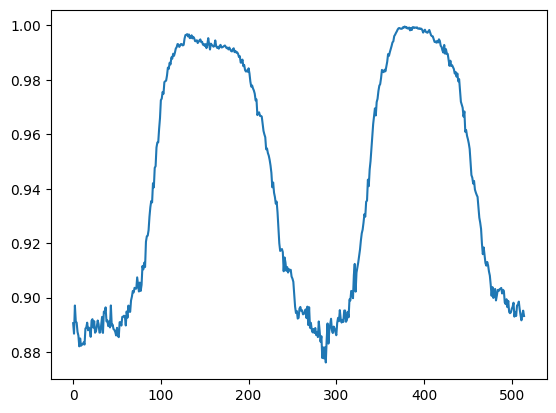

In [81]:
plt.plot(cors)